In [1]:
from __future__ import division
import pickle
import matplotlib.pyplot as plt
import math
import os
import numpy as np

In [2]:
# open data
path = '/home/charlieowen/Documents/ChaosClocksComputerVision/ProcessedVideo/'   

d = {}

for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'rb') as fh:
    #d["data{0}".format(filename)] = pickle.load(f)
        d["data{0}".format(filename)] = pickle.load(fh)

In [3]:
# open data
fp =  open(os.path.join(path, "DSC_0020.txt"))
data = pickle.load(fp)
# print(data)

# pagackes data as ditionary {color: time, x, y}
organized_data = {'red': {'t': [], 'x': [], 'y': []}, 'green': {'t': [], 'x': [],
'y': []}, 'blue': {'t': [], 'x': [], 'y': []}, 'yellow': {'t': [], 'x': [], 'y': []}}

rbdist = 300 # distance between centers of r and b (stationary) dots in mm

# Organize Data
for i in data:
    color = i[0]
    center = i[1]
    x = center[0]
    y = center[1]
    t = i[2]

    t_list = organized_data.get(color)['t']
    x_list = organized_data.get(color)['x']
    y_list = organized_data.get(color)['y']

    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

    organized_data[color] = {'t': t_list, 'x': x_list, 'y': y_list}



In [4]:
def calculate_angles(data, color1, color2):
    t1_list = data[color1]['t']
    t2_list = data[color2]['t']
    x1_list = data[color1]['x']
    x2_list = data[color2]['x']
    y1_list = data[color1]['y']
    y2_list = data[color2]['y']

    # print(data[color2])
    # print(data[color1])
    t_theta_list = []
    theta_list = []


    # print(t1_list);
    # print(t2_list);
    for t1 in t1_list:
        # diff = t1_list[-1]
        # if index < len(t2_list):
        # found = False
        if t1 in t2_list:
            # # if (abs(t2 - t1)) < tolerence and not found:
            # if t2 == t1:
            #     # diff =  abs(t2-t1)
            #     break

        #if t1 in t2_list:
            index2 = t2_list.index(t1)
            index1 = t1_list.index(t1)
            x1 = x1_list[index1]
            x2 = x2_list[index2]
            y1 = y1_list[index1]
            y2 = y2_list[index2]
            theta = calculate_angle(x1, x2, y1, y2)

            t_theta_list.append(t1)
            theta_list. append(theta)
                # found = True;
    return t_theta_list, theta_list

def calculate_angle(x1, x2, y1, y2):
    y = y1 - y2
    x = x2 - x1
    theta = 0
    if y:
        theta = math.atan(x/y)
    print(theta)
    return theta

def calculate_cart(dist, data, color1,color2):
    ##  Calculates cart position
    ## Dist is the distance between two points that do not change distance
    ## data is the dataset used (a dictionary holding the data from the colors)
    ## Color1 is the color of the sticker attached to the cart_pos
    ## Color2 is the color of a second sticker attached either to the cart,
    ##      or to the pendulum bob of the first sticker's pendulum
    t1_list = data[color1]['t']
    t2_list = data[color2]['t']
    x1_list = data[color1]['x']
    x2_list = data[color2]['x']
    y1_list = data[color1]['y']
    y2_list = data[color2]['y']

    #Calculate initial cart position in pixels
    
    cart_zero_pix = [x1_list[0], y1_list[0]] 
    # initialize the difference measuring vector
    delta = []

    for t1 in t1_list: #for every element in t1_list
        t1_index = t1_list.index(t1) #This is the index
        try:
            t2_index = t2_list.index(t1) #check if t2 has the same time somewhere
        except:
            pass
        else:
            #Find distance between two dots
            # print(x2_list[t2_index],x1_list[t1_index])
            delx = x2_list[t2_index] - x1_list[t1_index]
            dely = y2_list[t2_index] - y1_list[t1_index]
            deltaxy = math.sqrt(delx**2 +dely**2 )
            delta.append(deltaxy)
    # plt.figure(3)
    # plt.plot(delta)
    #Find the average distance between the dots
    avepix = sum(delta)/float(len(delta))
    #Calculate how many pixels per unit distance between the dots
    pixperdist = avepix/dist
    # print(pixperdist)
    
    #calculate position compared to initial position of cart
    cartrelpix_x=[]
    cartrelpix_y =[]
    cartrelpix_x[:] = [x - cart_zero_pix[0] for x in x1_list]
    cartrelpix_y[:] = [y - cart_zero_pix[1] for y in y1_list]
    
    cart_pos = []
    for relpix in cartrelpix_x:
        k=cartrelpix_x.index(relpix)
        #Identify if left or right of origin
        cartsign = 1
        if cartrelpix_x[k]<0:
            cartsign = -1
        cart_pos.append(cartsign*math.sqrt(cartrelpix_x[k]**2 +cartrelpix_y[k]**2 )*pixperdist)
    return t1_list, cart_pos


-0.0200776230135
-0.0200776230135
-0.0160628753927
-0.0160628753927
-0.0200776230135
-0.0200776230135
-0.0200776230135
-0.0200776230135
-0.0200776230135
-0.0200776230135
-0.0200776230135
-0.0200776230135
-0.0200776230135
-0.0240917234249
-0.0160628753927
-0.0200776230135
-0.0200776230135
-0.0160628753927
-0.0160628753927
-0.0160628753927
-0.0160628753927
-0.0160628753927
-0.0120476098542
-0.0120476098542
-0.0120476098542
-0.0120476098542
-0.0120476098542
-0.0160628753927
-0.0120476098542
-0.00803195578958
-0.00803195578958
-0.00803195578958
-0.00803195578958
-0.00803195578958
-0.00803195578958
-0.00401604266584
-0.00803195578958
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00401604266584
-0.00803195578958
-0.00803195578958
-0.0120476098542
-0.00803195578958
-0.0120476098542
-0.00803195578958
-0.00803195578958
-0.00803195578958
-0.0120476098542
-0.0120476098542
-0.0120

0.0481555130599
0.060168251155
0.0641688082095
0.0721636289597
0.0801492195402
0.0841382405312
0.0881245793406
0.0924774061009
0.0964737751826
0.0960887155174
0.0964737751826
0.0964737751826
0.0924774061009
0.0921081121115
0.0881245793406
0.0801492195402
0.0761576407328
0.0681673095342
0.0641688082095
0.0521614764757
0.0441480022845
0.0361288505128
0.0281050474605
0.0160628753927
0.00401604266584
-0.00401604266584
-0.0160628753927
-0.0281050474605
-0.0361288505128
-0.0481555130599
-0.0561657649332
-0.0681673095342
-0.0764635348195
-0.0844758990973
-0.0924774061009
-0.100467055515
-0.104457123474
-0.11242713083
-0.11687383736
-0.120865477305
-0.120865477305
-0.120865477305
-0.120865477305
-0.120865477305
-0.120865477305
-0.11687383736
-0.112878452527
-0.108879445269
-0.104457123474
-0.0964737751826
-0.088478072481
-0.0804710112655
-0.0721636289597
-0.0641688082095
-0.0521614764757
-0.0441480022845
-0.0321174661036
-0.0200776230135
-0.0120476098542
0.0
0.0120476098542
0.0200776230135
0.0

-0.100467055515
-0.100467055515
-0.0964737751826
-0.0924774061009
-0.0924774061009
-0.0844758990973
-0.0804710112655
-0.0764635348195
-0.0681673095342
-0.060168251155
-0.0521614764757
-0.0441480022845
-0.0401390720457
-0.0281050474605
-0.0200776230135
-0.0120476098542
-0.00401604266584
0.00401604266584
0.0120476098542
0.0200776230135
0.0281050474605
0.0361288505128
0.0441480022845
0.0481555130599
0.0561657649332
0.060168251155
0.0641688082095
0.0681673095342
0.0721636289597
0.0721636289597
0.0721636289597
0.0761576407328
0.0721636289597
0.0721636289597
0.0721636289597
0.0681673095342
0.0641688082095
0.060168251155
0.0521614764757
0.0481555130599
0.0401390720457
0.0361288505128
0.0281050474605
0.0200776230135
0.0120476098542
0.00401604266584
-0.00401604266584
-0.0160628753927
-0.0240917234249
-0.0321174661036
-0.0401390720457
-0.0481555130599
-0.0561657649332
-0.0641688082095
-0.068441321874
-0.0764635348195
-0.0804710112655
-0.0844758990973
-0.088478072481
-0.0924774061009
-0.096473775

0.0120476098542
0.0200776230135
0.0240917234249
0.0321174661036
0.0361288505128
0.0401390720457
0.0441480022845
0.0481555130599
0.0521614764757
0.0561657649332
0.0561657649332
0.0561657649332
0.0561657649332
0.0561657649332
0.0561657649332
0.0561657649332
0.0521614764757
0.0521614764757
0.0481555130599
0.0441480022845
0.0361288505128
0.0321174661036
0.0281050474605
0.0200776230135
0.0160628753927
0.00803195578958
0.00401604266584
-0.00401604266584
-0.0120476098542
-0.0200776230135
-0.0240917234249
-0.0321174661036
-0.0401390720457
-0.0441480022845
-0.0521614764757
-0.0561657649332
-0.060168251155
-0.068441321874
-0.0724535960886
-0.0764635348195
-0.0764635348195
-0.0804710112655
-0.0844758990973
-0.0844758990973
-0.0844758990973
-0.0844758990973
-0.0844758990973
-0.0804710112655
-0.0804710112655
-0.0764635348195
-0.0724535960886
-0.068441321874
-0.0641688082095
-0.060168251155
-0.0521614764757
-0.0481555130599
-0.0441480022845
-0.0361288505128
-0.0281050474605
-0.0240917234249
-0.01606

-0.0561657649332
-0.0561657649332
-0.0561657649332
-0.0521614764757
-0.0521614764757
-0.0481555130599
-0.0481555130599
-0.0441480022845
-0.0401390720457
-0.0361288505128
-0.0321174661036
-0.0281050474605
-0.0240917234249
-0.0200776230135
-0.0160628753927
-0.0120476098542
-0.00803195578958
-0.00401604266584
0.0
0.00401604266584
0.00803195578958
0.0120476098542
0.0160628753927
0.0160628753927
0.0200776230135
0.0240917234249
0.0240917234249
0.0281050474605
0.0281050474605
0.0281050474605
0.0321174661036
0.0321174661036
0.0321174661036
0.0281050474605
0.0281050474605
0.0281050474605
0.0240917234249
0.0240917234249
0.0200776230135
0.0160628753927
0.0160628753927
0.0120476098542
0.00803195578958
0.00401604266584
0.0
-0.00401604266584
-0.00803195578958
-0.0120476098542
-0.0160628753927
-0.0200776230135
-0.0240917234249
-0.0281050474605
-0.0321174661036
-0.0361288505128
-0.0401390720457
-0.0441480022845
-0.0481555130599
-0.0481555130599
-0.0521614764757
-0.0521614764757
-0.0561657649332
-0.056

0.0770827398765
0.0689959982287
0.0606542542272
0.0485448263888
0.0404637315477
0.0283324974175
0.0161929165175
0.00404856087603
-0.00809698903774
-0.0202401506418
-0.0323773455787
-0.0483493866519
-0.0606542542272
-0.0724535960886
-0.0851593926197
-0.0968619236946
-0.109318533888
-0.117819139901
-0.129877026772
-0.137894788953
-0.145894748899
-0.154496616934
-0.15849541564
-0.162489109217
-0.165810490687
-0.165810490687
-0.166477580287
-0.165810490687
-0.165810490687
-0.161837431238
-0.15849541564
-0.149887752108
-0.145894748899
-0.137894788953
-0.129877026772
-0.117819139901
-0.109318533888
-0.0972531982516
-0.0851593926197
-0.0730405653031
-0.0606542542272
-0.0485448263888
-0.0322468824353
-0.0202401506418
-0.00809698903774
0.00404856087603
0.0161276338436
0.0283324974175
0.0364211342145
0.0485448263888
0.0566195810092
0.064949168968
0.0727458987759
0.0807953916875
0.0848162721979
0.0888344054753
0.0928496647226
0.0928496647226
0.0928496647226
0.0928496647226
0.0888344054753
0.08883

-0.0403007483038
-0.0282183142356
-0.0201585592841
-0.00806434130677
0.00403223621109
0.0161276338436
0.0241888296588
0.036274403857
0.044325785807
0.0523714214025
0.0566195810092
0.0646869512678
0.0687175425186
0.0727458987759
0.0767718912698
0.0767718912698
0.0807953916875
0.0807953916875
0.0767718912698
0.0767718912698
0.0727458987759
0.0687175425186
0.0604102764177
0.056391760926
0.0483493866519
0.0403007483038
0.0282183142356
0.0201585592841
0.00806434130677
0.0
-0.0120961841972
-0.0241888296588
-0.0322468824353
-0.044325785807
-0.056391760926
-0.068441321874
-0.0807953916875
-0.0888344054753
-0.100871056721
-0.108879445269
-0.117344593619
-0.125355494463
-0.133350254172
-0.137341277467
-0.141327902702
-0.145310010636
-0.149887752108
-0.153875945382
-0.153875945382
-0.153875945382
-0.14928748287
-0.149887752108
-0.145310010636
-0.141327902702
-0.133350254172
-0.125355494463
-0.117344593619
-0.108879445269
-0.100871056721
-0.0928496647226
-0.0807953916875
-0.068441321874
-0.0604102

0.0727458987759
0.0727458987759
0.0727458987759
0.0767718912698
0.0727458987759
0.0727458987759
0.0687175425186
0.0646869512678
0.0604102764177
0.0523714214025
0.0483493866519
0.0403007483038
0.0322468824353
0.0241888296588
0.0120961841972
0.00403223621109
-0.00806434130677
-0.0201585592841
-0.0282183142356
-0.0403007483038
-0.0523714214025
-0.0604102764177
-0.0724535960886
-0.0848162721979
-0.0928496647226
-0.100871056721
-0.108879445269
-0.11687383736
-0.125355494463
-0.133350254172
-0.137341277467
-0.141327902702
-0.145310010636
-0.145310010636
-0.14928748287
-0.14928748287
-0.145310010636
-0.145310010636
-0.141327902702
-0.137341277467
-0.133350254172
-0.125355494463
-0.121352000571
-0.112878452527
-0.10487693873
-0.0928496647226
-0.0848162721979
-0.0727458987759
-0.0644268394256
-0.0523714214025
-0.0403007483038
-0.0322468824353
-0.0201585592841
-0.0120961841972
0.0
0.0120961841972
0.0201585592841
0.0282183142356
0.036274403857
0.044325785807
0.0523714214025
0.0604102764177
0.0646

0.0646869512678
0.0687175425186
0.0727458987759
0.0727458987759
0.0727458987759
0.0687175425186
0.0687175425186
0.0646869512678
0.0606542542272
0.056391760926
0.0483493866519
0.044325785807
0.036274403857
0.0282183142356
0.0201585592841
0.00806434130677
0.0
-0.0120961841972
-0.0201585592841
-0.0322468824353
-0.044325785807
-0.0523714214025
-0.0644268394256
-0.0724535960886
-0.0848162721979
-0.0928496647226
-0.100871056721
-0.108879445269
-0.11687383736
-0.125355494463
-0.129354952881
-0.133350254172
-0.137341277467
-0.141327902702
-0.141327902702
-0.145310010636
-0.145310010636
-0.141327902702
-0.141327902702
-0.137341277467
-0.133350254172
-0.129354952881
-0.121352000571
-0.117344593619
-0.108879445269
-0.100871056721
-0.0888344054753
-0.0807953916875
-0.0724535960886
-0.0604102764177
-0.0523714214025
-0.0403007483038
-0.0282183142356
-0.0201585592841
-0.00806434130677
0.0
0.0120961841972
0.0201585592841
0.0282183142356
0.036274403857
0.044325785807
0.0523714214025
0.056391760926
0.06

0.0483493866519
0.0523714214025
0.0604102764177
0.0646869512678
0.0646869512678
0.0687175425186
0.0687175425186
0.0687175425186
0.0687175425186
0.0646869512678
0.0604102764177
0.056391760926
0.0523714214025
0.044325785807
0.0403007483038
0.0322468824353
0.0241888296588
0.0161276338436
0.00403223621109
-0.00403223621109
-0.0120961841972
-0.0241888296588
-0.0322468824353
-0.044325785807
-0.056391760926
-0.0644268394256
-0.0724535960886
-0.0848162721979
-0.0928496647226
-0.100871056721
-0.108879445269
-0.11687383736
-0.121352000571
-0.129354952881
-0.133350254172
-0.137341277467
-0.137341277467
-0.141327902702
-0.141327902702
-0.141327902702
-0.141327902702
-0.137341277467
-0.133350254172
-0.129354952881
-0.125355494463
-0.11687383736
-0.112878452527
-0.10487693873
-0.0968619236946
-0.0888344054753
-0.0764635348195
-0.068441321874
-0.0604102764177
-0.0483493866519
-0.0403007483038
-0.0282183142356
-0.0161276338436
-0.00806434130677
0.0
0.0120961841972
0.0201585592841
0.0282183142356
0.036

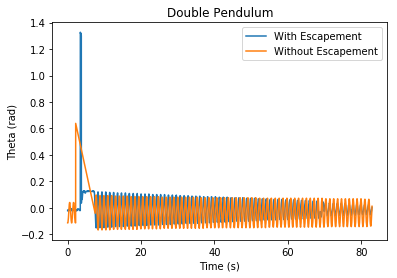

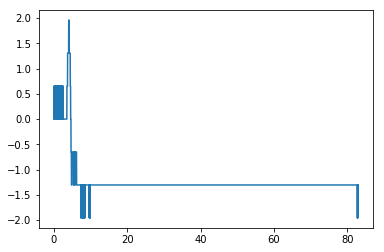

In [9]:
# print(organized_data['blue']['t'])
theta_data1 = calculate_angles(organized_data, 'yellow', 'blue')
theta_data2 = calculate_angles(organized_data, 'green', 'red')

# print(theta_data[0])
fig1 = plt.figure(1)
plt.plot(theta_data1[0], theta_data1[1], label = 'Yellow Pendulum')
plt.plot(theta_data2[0], theta_data2[1], label = 'Green Pendulum')
plt.ylabel("Theta (rad)")
plt.xlabel('Time (s)')
plt.title('Double Pendulum')
plt.legend(['With Escapement','Without Escapement'])

#plt.plot(organized_data['yellow']['x'], organized_data['yellow']['y'], 'y')
#plt.plot(organized_data['blue']['x'], organized_data['blue']['y'], 'b')

plt.show()


cart_data = calculate_cart(rbdist, organized_data,'blue','red')
plt.figure(2)
plt.plot(cart_data[0],cart_data[1])
plt.show()

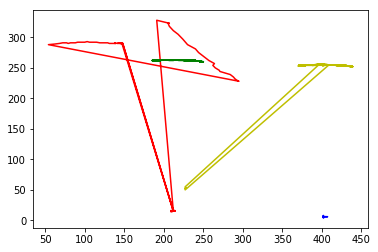

In [6]:
plt.plot(organized_data['yellow']['x'], organized_data['yellow']['y'], 'y')
plt.plot(organized_data['blue']['x'], organized_data['blue']['y'], 'b')
plt.plot(organized_data['red']['x'], organized_data['red']['y'], 'r')
plt.plot(organized_data['green']['x'], organized_data['green']['y'], 'g')
plt.show()

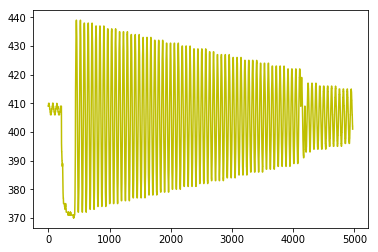

In [8]:
def reject_outliers(data):
    m = 2
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered_x = reject_outliers(organized_data['yellow']['x'])
time = np.linspace(0, len(filtered_x), len(filtered_x))

plt.plot(time, filtered_x, 'y')
plt.show()